# Королева И. Лаб. 9

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
from sklearn.linear_model import (LinearRegression, LassoCV, RidgeCV, Lasso, Ridge )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer)
from sklearn.metrics import (mean_squared_error, r2_score)
from sklearn.linear_model import (ElasticNet, ElasticNetCV)

In [51]:
## https://archive.ics.uci.edu/ml/datasets/Bike%20Sharing%20Dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## предварительный анализ данных: шкалы измерения, типы данных, корреляцию и т.п.

In [52]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [53]:
bike.info()
# Пустых значений нет
# Все данные числовые, кроме столбца (dteday)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


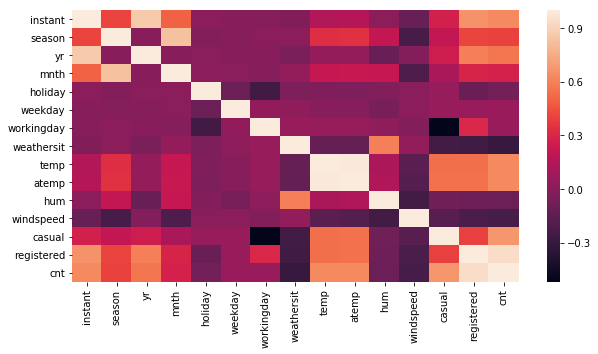

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(bike.corr(), ax=ax)

## визуализация данных

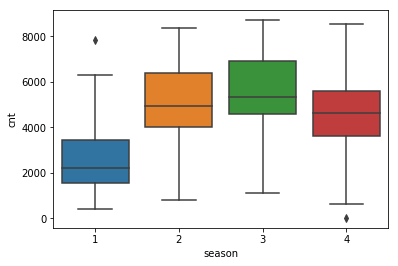

In [55]:
sns.boxplot(x='season', y='cnt', data=bike)

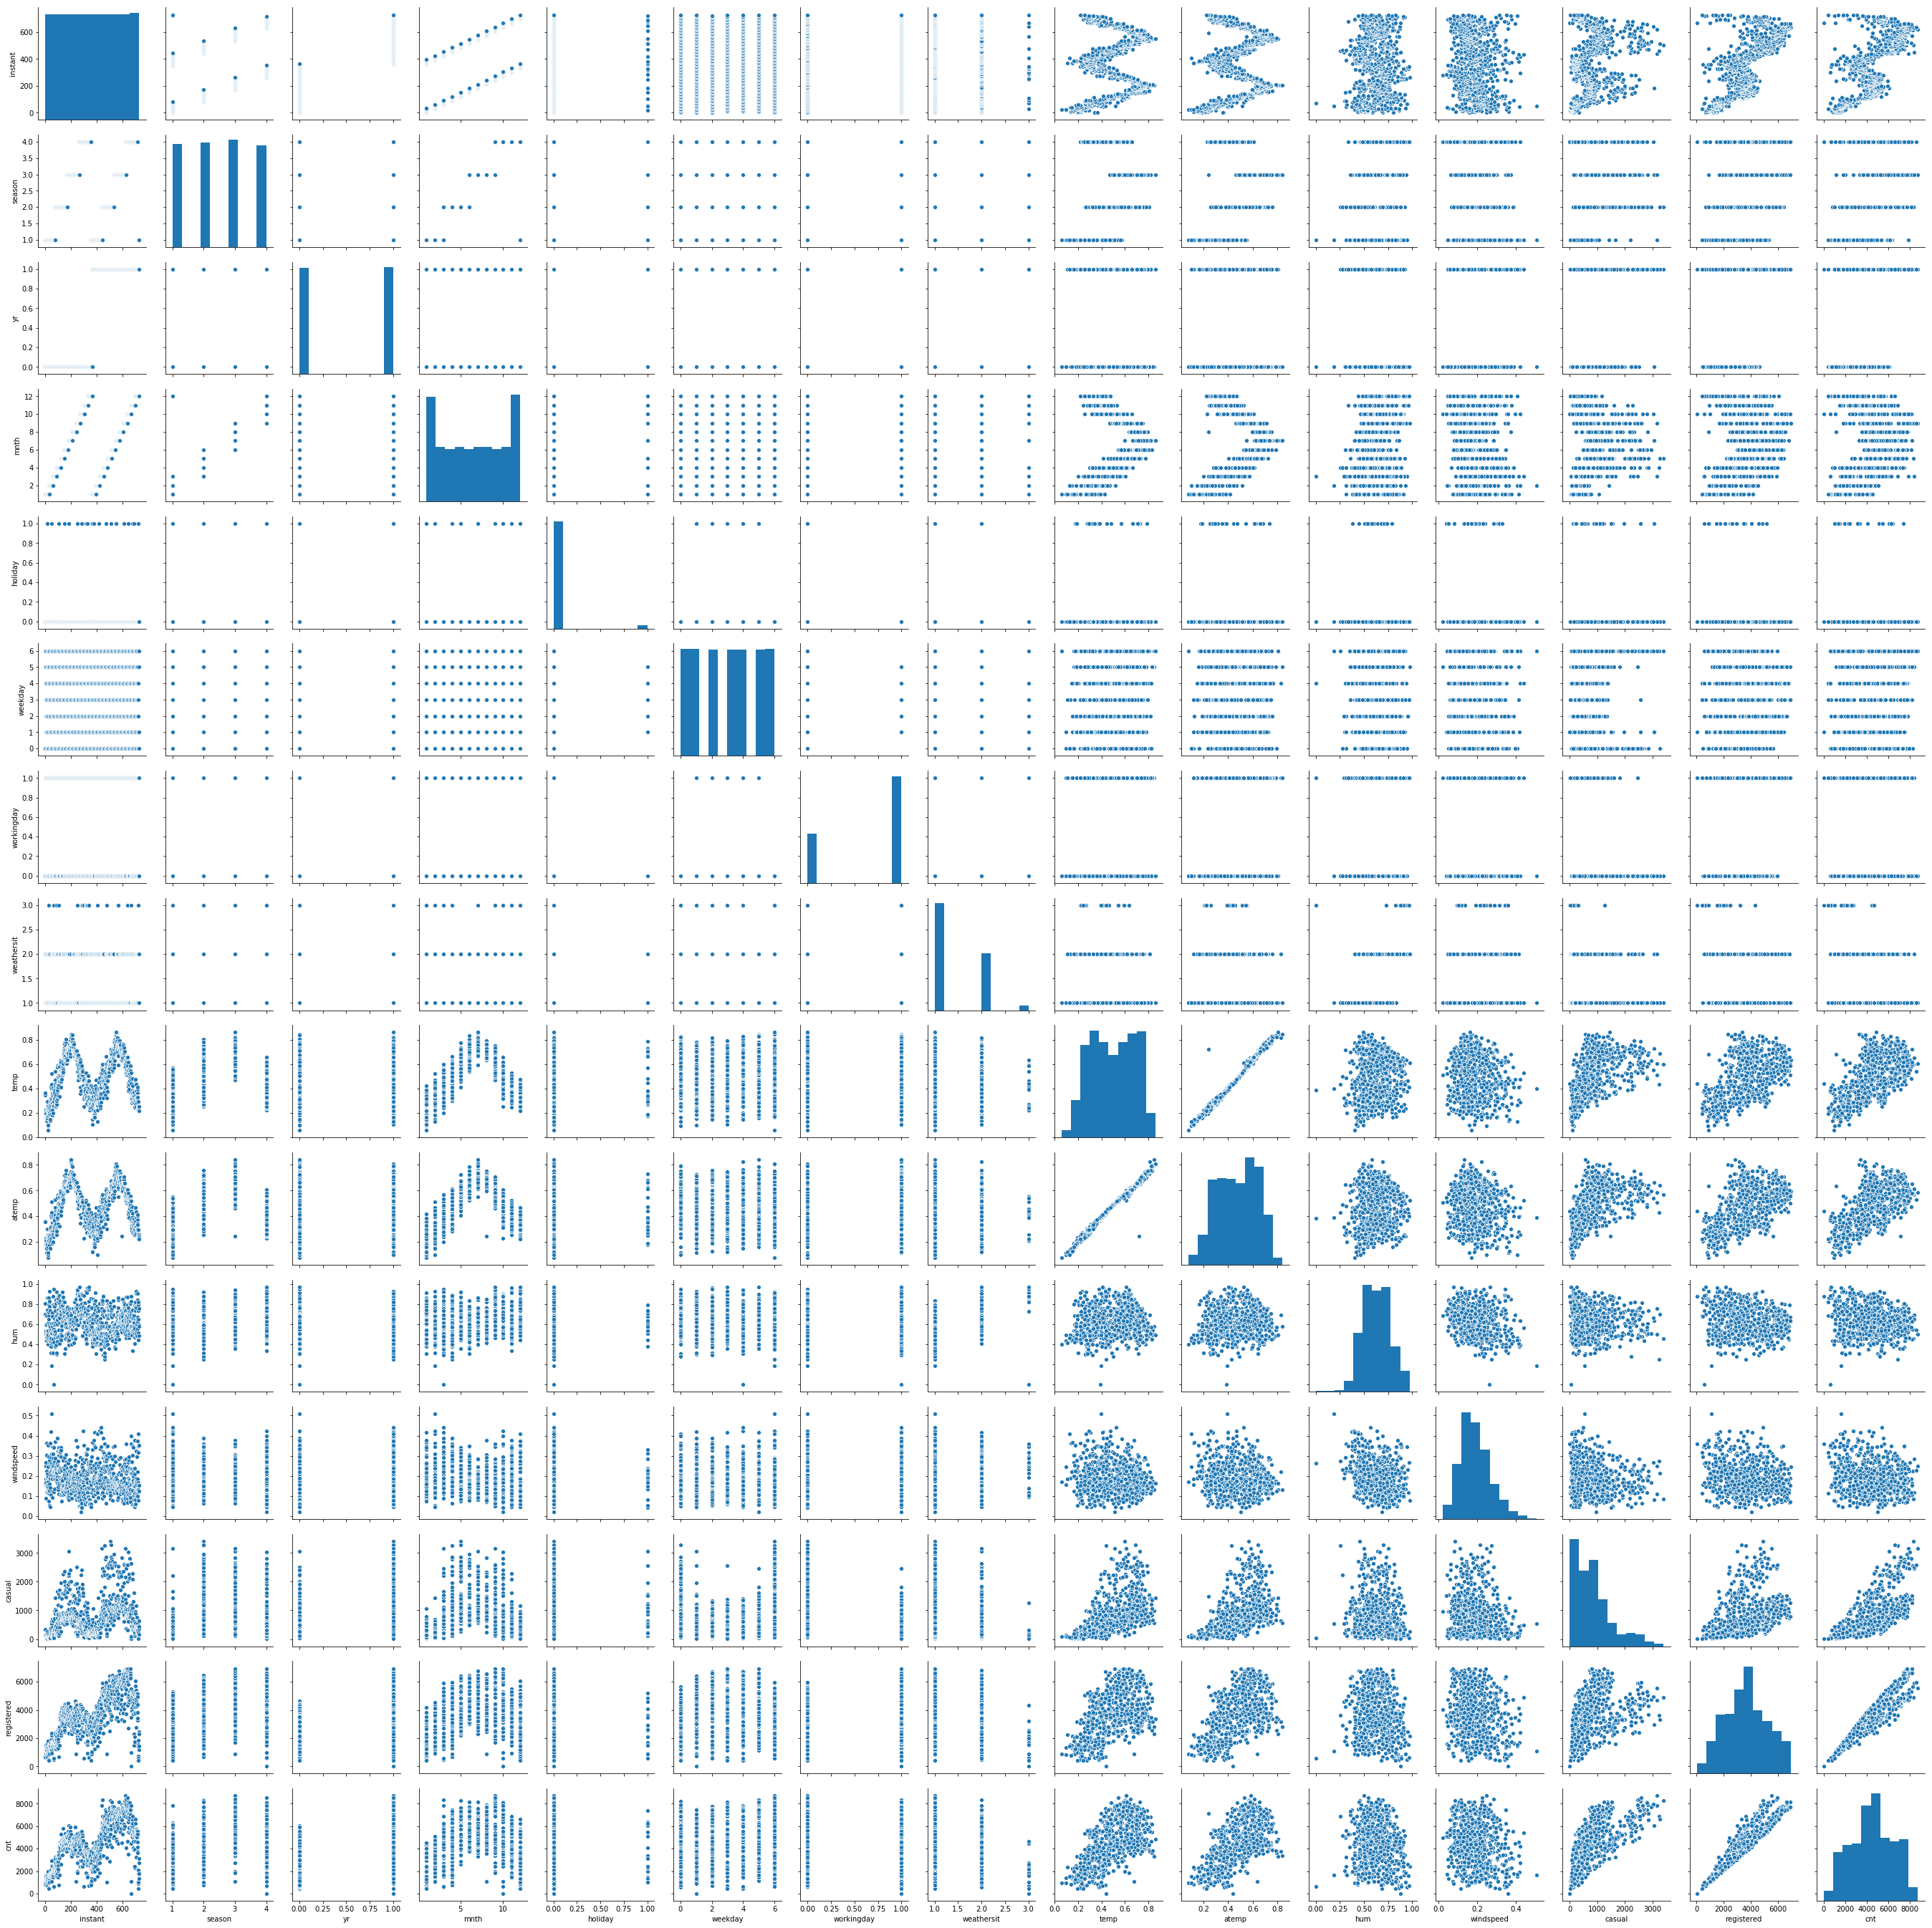

In [56]:
sns.pairplot(data=bike)

In [57]:
# Дополнительно исключим столбец dteday
# т.к. вся необходимая информация из него
# содержится в других столбцах
X = bike.drop(['dteday', 'cnt'], axis=1)
y = bike.cnt

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
X_train.shape, X_test.shape

((511, 14), (220, 14))

In [60]:
## Масштабирование
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [61]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

In [62]:
def train_validate_report(model, X_train, X_test, y_train, y_test, feature_names, X_scaled:bool,
                          model_name=None, verbose=True):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    coefs = {'intercept': l.intercept_, **dict(zip(feature_names, model.coef_))}
    coefs_df = pd.DataFrame.from_dict({'value': coefs})
    
    if verbose:
        if model_name:
            if X_scaled: model_name += '(scaled)'
            print(f'##### {model_name} ####')
        print(f'RMSE = {rmse}')
        print(f'R^2 = {r2}')
        print(coefs_df)
        print()
    
    return rmse, r2, coefs, model

In [63]:
X_train_scaled

array([[-0.7000499 ,  0.44813519, -1.03789969, ..., -0.84294654,
         0.23845793,  0.11792085],
       [ 1.48608989,  1.353262  ,  0.96348424, ..., -0.48118902,
        -0.79986784,  0.94939794],
       [ 1.49083206,  1.353262  ,  0.96348424, ..., -0.24274051,
        -0.56691924,  1.00762096],
       ...,
       [-0.47716797,  1.353262  , -1.03789969, ..., -0.53879844,
        -0.57260091, -0.16141881],
       [ 0.30528987, -1.36211843,  0.96348424, ...,  0.43886957,
         1.10065184, -0.27524809],
       [-1.27385232, -0.45699162, -1.03789969, ...,  0.80940466,
        -0.95753427, -1.12569672]])

## Lasso

In [64]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(X_train_scaled, y_train)
print(lasso_regression.predict(X_test_scaled))
print()
print('вывод точности предсказания',lasso_regression.score(X_test_scaled, y_test))

[6605.92383739 1550.19060226 3747.06372122 6040.84221509 7537.8624
 7263.86743075 1605.18850296 2209.15353609 7498.82413072 5742.94452641
 1796.16081482 3068.10937251 4890.99372014 5260.00825487 2133.14789051
 2471.08801619 2046.14938414 8155.79299872 5361.94036893 2298.1461083
 7696.83494912 5462.96073662 5408.97326542 1872.1644735  1807.17619389
 5129.96913814 2121.15525729 7435.85779388 3830.07746763 5556.98016839
 2743.11559234 3644.06415941 6195.93681564 7493.85284438 5917.93998698
 3372.04657801 7581.83143473 6052.87284041 2566.13985388 1263.20515404
 3944.04502376 3956.0680627  7579.84664113 4905.93533569 6965.87178146
  705.23091777 4458.00717561 5297.96793767 6042.82947728 4995.9403243
 3351.03534097 2431.1396864  1011.21023617 4474.96314755 4725.00187126
 4726.99250517 2395.13908781 3351.04124149 4787.90053279 7174.85035334
 6152.91914504 7441.85293641 1471.18762625 7864.72771999 6529.8988044
 6210.92304631 7402.76535568 4301.97337322 2077.13101058 7332.79248346
 3117.0350025

In [65]:
(len(lasso_regression.predict(X_test))==len(X_test))

True

In [66]:
lasso1 = lasso_regression.predict(X_test_scaled)

## LassoCV

In [67]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas=[0.1,1.0,10])
a = lassocv.fit(X_train_scaled, y_train)
print(lassocv.predict(X_test_scaled))
print()
print('вывод точности предсказания',lassocv.score(X_test_scaled, y_test))
print('оптимальное альфа',a.alpha_)

[6605.92383739 1550.19060226 3747.06372122 6040.84221509 7537.8624
 7263.86743075 1605.18850296 2209.15353609 7498.82413072 5742.94452641
 1796.16081482 3068.10937251 4890.99372014 5260.00825487 2133.14789051
 2471.08801619 2046.14938414 8155.79299872 5361.94036893 2298.1461083
 7696.83494912 5462.96073662 5408.97326542 1872.1644735  1807.17619389
 5129.96913814 2121.15525729 7435.85779388 3830.07746763 5556.98016839
 2743.11559234 3644.06415941 6195.93681564 7493.85284438 5917.93998698
 3372.04657801 7581.83143473 6052.87284041 2566.13985388 1263.20515404
 3944.04502376 3956.0680627  7579.84664113 4905.93533569 6965.87178146
  705.23091777 4458.00717561 5297.96793767 6042.82947728 4995.9403243
 3351.03534097 2431.1396864  1011.21023617 4474.96314755 4725.00187126
 4726.99250517 2395.13908781 3351.04124149 4787.90053279 7174.85035334
 6152.91914504 7441.85293641 1471.18762625 7864.72771999 6529.8988044
 6210.92304631 7402.76535568 4301.97337322 2077.13101058 7332.79248346
 3117.0350025

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [68]:
lassocv1 = lassocv.predict(X_test_scaled)

## Ridge

In [69]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(X_train_scaled, y_train)
print(ridge_regression.predict(X_test_scaled))
print()
print('вывод точности предсказания',ridge_regression.score(X_test_scaled, y_test))

[6605.46420524 1550.21486061 3746.53358651 6040.31047374 7537.11712375
 7263.65066482 1604.55417124 2208.97078436 7498.73740069 5743.47433563
 1796.53780979 3067.06936019 4890.29388774 5259.84364971 2133.45649885
 2470.6465127  2046.5724742  8155.54645847 5362.39564967 2298.20158381
 7696.34652198 5465.01890519 5408.80892988 1871.9741331  1806.75989554
 5129.77802176 2121.09146796 7435.31567317 3830.11820333 5557.10959723
 2742.84041851 3644.53371068 6195.48567669 7492.81879298 5917.61983607
 3373.14930304 7581.27040447 6053.00457112 2566.52937664 1263.06044848
 3944.09193378 3955.95846635 7579.49696287 4904.84330055 6966.12536386
  706.75113793 4458.64642154 5297.89193729 6043.77073267 4995.476321
 3351.14330983 2430.74818336 1011.13516415 4475.75166011 4725.0490873
 4726.73956705 2396.51255085 3350.29734386 4787.81935613 7174.87968432
 6152.35127543 7441.18346438 1471.78833189 7864.7412137  6529.56988878
 6211.50038675 7403.3310264  4302.62703136 2076.4825938  7332.3231209
 3117.0174

In [70]:
ridge1 = ridge_regression.predict(X_test_scaled)

## RidgeCV

In [71]:
from sklearn.linear_model import RidgeCV
ridgecv_m = RidgeCV(alphas=[0.1,1.0,10])
b = ridgecv_m.fit(X_train_scaled, y_train)
print(ridgecv_m.predict(X_test_scaled))
print()
print('вывод точности предсказания',ridgecv_m.score(X_test_scaled, y_test))
print('оптимальное альфа',b.alpha_)

[6605.46420525 1550.21486059 3746.53358651 6040.31047374 7537.11712376
 7263.65066483 1604.55417122 2208.97078436 7498.7374007  5743.47433563
 1796.53780979 3067.06936019 4890.29388774 5259.84364972 2133.45649883
 2470.64651269 2046.57247419 8155.54645848 5362.39564966 2298.20158379
 7696.34652199 5465.01890519 5408.80892988 1871.97413308 1806.75989553
 5129.77802176 2121.09146796 7435.31567318 3830.11820333 5557.10959724
 2742.84041852 3644.53371069 6195.48567669 7492.81879298 5917.61983607
 3373.14930304 7581.27040448 6053.00457113 2566.52937665 1263.06044846
 3944.09193377 3955.95846634 7579.49696288 4904.84330055 6966.12536387
  706.75113793 4458.64642154 5297.89193728 6043.77073266 4995.476321
 3351.14330983 2430.74818337 1011.13516415 4475.75166011 4725.0490873
 4726.73956706 2396.51255086 3350.29734386 4787.81935613 7174.87968433
 6152.35127543 7441.18346438 1471.78833188 7864.7412137  6529.56988879
 6211.50038676 7403.33102639 4302.62703136 2076.48259379 7332.32312091
 3117.017

In [72]:
ridgecv1 = ridgecv_m.predict(X_test_scaled)

## 9. Проверить обучение на тестовой выборке

In [73]:
y_train

223    4905
684    5445
685    5698
163    5020
394    3624
641    7572
490    6883
390    4075
371    4521
334    3727
457    5936
104    3126
114    4073
656    7509
239    4334
655    7461
294    4308
92     3249
7       959
89     1685
554    4672
393    3243
670    5986
677    5315
590    6883
547    5531
420    2732
409    3922
11     1162
140    5805
       ... 
21      981
313    2933
459    6436
160    4586
276    4456
191    4086
385    1301
413    4318
491    6359
343    3190
308    3926
661    7466
130    4182
663    7359
99     2895
372    3425
87     2425
458    6772
330    3071
214    3574
466    4862
121    4401
614    6203
20     1543
700    5191
71     2417
106    3744
270    3907
435    4911
102    2162
Name: cnt, Length: 511, dtype: int64

In [74]:
y_test

703    6606
33     1550
300    3747
456    6041
633    7538
557    7264
39     1605
356    2209
559    7499
514    5743
729    1796
355    3068
164    4891
697    5260
66     2133
78     2471
72     2046
643    8156
181    5362
380    2298
606    7697
545    5463
467    5409
65     1872
54     1807
235    5130
81     2121
632    7436
404    3830
717    5557
       ... 
531    7665
411    3005
292    4195
481    5026
83     2210
61     1685
204    3606
424    1834
29     1096
231    5191
213    4845
487    6169
712    5532
182    5119
626    4073
248    2710
518    8120
362    2423
664    7444
549    6660
654    7534
209    3846
450    5558
408    3422
176    5305
299    2659
516    7338
533    6978
264    4795
137    3855
Name: cnt, Length: 220, dtype: int64

In [75]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                     columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [76]:
mas_for_mse = [lasso1, lassocv1, ridge1, ridgecv1]
msemas = []
for i in mas_for_mse:
    msemas.append(mean_squared_error(y_test,i))
msemas

[0.015357164602674953,
 0.015357164602674953,
 0.4935619089936836,
 0.49356190766388297]

In [77]:
regression_coef(lasso_regression, X, y)

,predictor,coef,pvalue
0,intercept,4556.866928,0.998171
1,instant,0.000000,1.000000
2,season,0.000000,1.000000
3,yr,0.000000,1.000000
4,mnth,0.000000,1.000000
5,holiday,-0.000000,1.000000
6,weekday,0.000000,1.000000
7,workingday,-0.000000,1.000000
8,weathersit,-0.000000,1.000000
9,temp,0.000000,1.000000


In [78]:
regression_coef(lassocv, X, y)

,predictor,coef,pvalue
0,intercept,4556.866928,0.998171
1,instant,0.000000,1.000000
2,season,0.000000,1.000000
3,yr,0.000000,1.000000
4,mnth,0.000000,1.000000
5,holiday,-0.000000,1.000000
6,weekday,0.000000,1.000000
7,workingday,-0.000000,1.000000
8,weathersit,-0.000000,1.000000
9,temp,0.000000,1.000000


In [79]:
regression_coef(ridge_regression, X, y)

,predictor,coef,pvalue
0,intercept,4556.866928,0.998169
1,instant,-0.792361,0.999978
2,season,0.530721,0.999999
3,yr,1.566208,1.000000
4,mnth,0.280767,1.000000
5,holiday,-0.022629,1.000000
6,weekday,0.091201,0.999999
7,workingday,0.453587,1.000000
8,weathersit,-0.271740,1.000000
9,temp,-0.158394,1.000000


In [80]:
regression_coef(ridgecv_m, X, y)

,predictor,coef,pvalue
0,intercept,4556.866928,0.998169
1,instant,-0.792361,0.999978
2,season,0.530721,0.999999
3,yr,1.566208,1.000000
4,mnth,0.280767,1.000000
5,holiday,-0.022629,1.000000
6,weekday,0.091201,0.999999
7,workingday,0.453587,1.000000
8,weathersit,-0.271740,1.000000
9,temp,-0.158394,1.000000


In [81]:
mas_for_r2 = [lasso1, lassocv1, ridge1, ridgecv1]
r2mas = []
for i in mas_for_mse:
    r2mas.append(r2_score(y_test,i))

r2mas

[0.9999999961404132,
 0.9999999961404132,
 0.9999998759572463,
 0.9999998759572466]

In [82]:
date = pd.DataFrame({'MSE':msemas,'R2':r2mas})
date.index = ['lasso1','lassocv1','ridge1','ridgecv1']
date

,MSE,R2
lasso1,0.015357,1.0
lassocv1,0.015357,1.0
ridge1,0.493562,1.0
ridgecv1,0.493562,1.0


## графики обученных и реальных данных

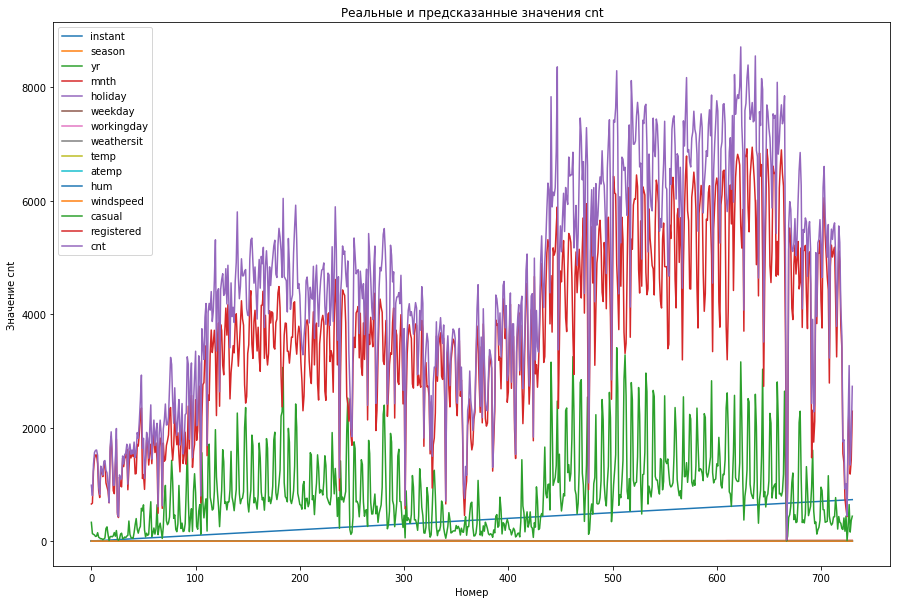

In [83]:
ax = bike.plot(figsize=(15, 10))
ax.set_xlabel('Номер')
ax.set_ylabel('Значение cnt')
ax.set_title('Реальные и предсказанные значения cnt');

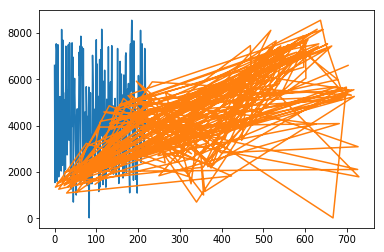

In [84]:
plt.plot(ridgecv_m.predict(X_test_scaled))
plt.plot(y_test)

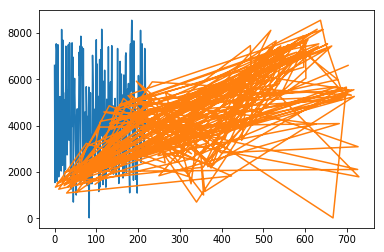

In [85]:
plt.plot(ridge_regression.predict(X_test_scaled))
plt.plot(y_test)

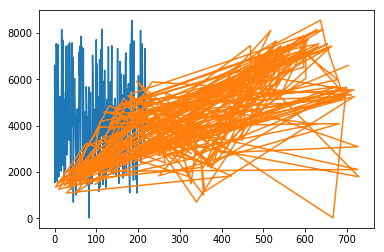

In [86]:
plt.plot(lasso_regression.predict(X_test_scaled))
plt.plot(y_test)

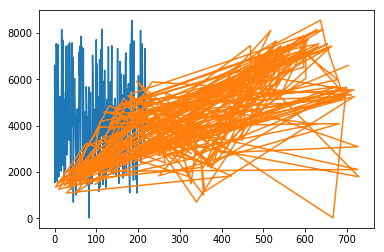

In [87]:
plt.plot(lassocv.predict(X_test_scaled))
plt.plot(y_test)

In [88]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
b = knn_model.predict(X_test_scaled)

In [90]:
r2_score(y_test,b)

0.8189008881181481

In [91]:
mean_squared_error(y_test,b)

720587.2227272728

## Вывод: Выбранная модель обучения KNN является довольно эффективной, поскольку дает достаточно высокую точность предсказания